<a href="https://colab.research.google.com/github/erica-mccormick/tutorials/blob/main/extract_and_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Step 0:** Imports & authentication

In [ ]:
pip install geopandas -q # deals with shapefiles

In [ ]:
pip install rasterio -q # deals with rasters

     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio

# google earth engine (GEE) - allows for access to Google's repository of remote sensing products, but requires authentication
import ee 
ee.Authenticate()
ee.Initialize()

# mounting google drive so that directories are accessible to read and write to - this is necessary for GEE in particular
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=0yUAg0d71YjjLwA8yTvlfHAiBhKNcAietzh_n4WHZeE&tc=5SXlhlt_V3KLcxans8Nh6s1M01Z94HCKywaOmYh9H0c&cc=UT3rYz9ASB5yErkN8WwyKaVb2Zv7sF0DeAjHfmVJWUs

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AdQt8qiy_z8ZepnXlQWv3qrxrmXoyBFQDTXtpcpTs0lXEZWwmXuX1zFF0Og

Successfully saved authorization token.
Mounted at /content/drive


In [ ]:
pip install waterpyk==2.2.0 # my personal package - install this at the end as it depends on GEE, rasterio, and geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.4 MB/s 


In [ ]:
import waterpyk
from waterpyk.main import StudyArea # the main class that automates most processes
from waterpyk import mapping_tools # for dealing with rasters and shapefile outside of GEE (see step 3)


Output will be saved at /content/drive/MyDrive



#**Step 1**: Extract, process, and save data

Identify points of interest. Currently set up to accept a **list of lat/longs or a USGS watershed ID or a geodataframe with a geometry**.

The following code does the following, and more, with just one line of code:
* Extracts many datasets from GEE, including static and timeseries products
* Renames bands to sensible naming conventions
* Applies scaling factors, where necessary
* Interpolates to daily timestep
* Calculates several hydrologic indices, such as RWS and Smax

In [ ]:
#### Points of interest ###

san_antonio_falls = [34.272016, -117.634575]
three_sisters_falls = [32.975153, -116.685129]

#### Watersheds of interest (???) ###

# Relevant to Mt Baldy? https://waterdata.usgs.gov/monitoring-location/11062000/
# lytle_cr = [1106200] # LYTLE C NR FONTANA CA #BAD REQUEST

# Relevant to Cleveland NF? https://waterdata.usgs.gov/monitoring-location/11015000/#parameterCode=00065&period=P7D
sweetwater = [11015000] #SWEETWATER R NR DESCANSO CA

### Entire national forest ###
sanbern = gpd.read_file('/content/drive/MyDrive/Rock moisture/Datasets/geometries/NatlForests/SanBernadino/SanBernadinoNF.shp')

Use the StudyArea() class to download, process, and save data from this site. CSVs are saved to GoogleDrive at the path printed out after the package import (see above). The first time running this code will take ~1 min, but after that, the saved CSVs will be called and it will be instantaneous.

In [ ]:
sb_nf = StudyArea(coords = sanbern, layers = 'all', site_name = 'San Bernardino National Forest')

Getting layers from load_data()...
Extracting prism
	Original timestep of 1 day(s) was interpolated to daily.
Extracting pml
	Original timestep of 8 day(s) was interpolated to daily.
	Es, Ec, Ei bands were scaled by 0.01
Extracting modis_snow
	Bands NDSI_Snow_Cover renamed to snow.
	Original timestep of 1 day(s) was interpolated to daily.
Extracting modis_ET
	Original timestep of 8 day(s) was interpolated to daily.
	ET, PET bands were scaled by 0.08
Extracting modis_landcover
	Bands LC_Type1 renamed to landcover.
Extracting srtm_elevation

Saving all dataframes at:
	/content/drive/MyDrive/San Bernardino National Forest

Time to access data: 124.251 seconds


In [ ]:
saf = StudyArea(coords = san_antonio_falls, layers = 'all', site_name = 'San Antonio Falls')

Getting layers from load_data()...
Extracting prism
	Original timestep of 1 day(s) was interpolated to daily.
Extracting pml
	Original timestep of 8 day(s) was interpolated to daily.
	Es, Ec, Ei bands were scaled by 0.01
Extracting modis_snow
	Bands NDSI_Snow_Cover renamed to snow.
	Original timestep of 1 day(s) was interpolated to daily.
Extracting modis_ET
	Original timestep of 8 day(s) was interpolated to daily.
	ET, PET bands were scaled by 0.08
Extracting modis_landcover
	Bands LC_Type1 renamed to landcover.
Extracting srtm_elevation

Saving all dataframes at:
	/content/drive/MyDrive/34.272016_-117.634575

Time to access data: 24.645 seconds


In [ ]:
tsf = StudyArea(coords = three_sisters_falls, layers = 'all', site_name = 'Three Sisters Falls')

Getting layers from load_data()...
Extracting prism
	Original timestep of 1 day(s) was interpolated to daily.
Extracting pml
	Original timestep of 8 day(s) was interpolated to daily.
	Es, Ec, Ei bands were scaled by 0.01
Extracting modis_snow
	Bands NDSI_Snow_Cover renamed to snow.
	Original timestep of 1 day(s) was interpolated to daily.
Extracting modis_ET
	Original timestep of 8 day(s) was interpolated to daily.
	ET, PET bands were scaled by 0.08
Extracting modis_landcover
	Bands LC_Type1 renamed to landcover.
Extracting srtm_elevation

Saving all dataframes at:
	/content/drive/MyDrive/32.975153_-116.685129

Time to access data: 26.875 seconds


In [ ]:
wtrshd_angeles = StudyArea(coords = sweetwater, layers = 'all')

Getting layers from load_data()...
Extracting prism
	Original timestep of 1 day(s) was interpolated to daily.
Extracting pml
	Original timestep of 8 day(s) was interpolated to daily.
	Es, Ec, Ei bands were scaled by 0.01
Extracting modis_snow
	Bands NDSI_Snow_Cover renamed to snow.
	Original timestep of 1 day(s) was interpolated to daily.
Extracting modis_ET
	Original timestep of 8 day(s) was interpolated to daily.
	ET, PET bands were scaled by 0.08
Extracting modis_landcover
	Bands LC_Type1 renamed to landcover.
Extracting srtm_elevation

Streamflow data is being retrieved from: https://labs.waterdata.usgs.gov/api/nldi/linked-data/nwissite/USGS-11015000/navigation/UM/flowlines?f=json&distance=1000 


Saving all dataframes at:
	/content/drive/MyDrive/11015000

Time to access data: 37.528 seconds


The layers = 'all' argument is the default I created that downloads most of the products I use regularly. However, you can also substitute a dataframe in this form (this is the 'all' one) if you wish to extract different products. NOTE: If you don't have all of the products in the 'all' dataframe, some of the default calculations may be skipped. Alternatively, if the 'coords' argument recieves a USGS watershed, then streamflow will also be downloaded and additional calculations will be automatically performed.

In [ ]:
tsf.extracted_df

,name,asset_id,scale,start_date,end_date,relative_date,bands,new_bandnames,bands_to_scale,scaling_factor,units
0,prism,OREGONSTATE/PRISM/AN81d,500,10/1/03,10/1/2020,NaN,ppt,NaN,NaN,NaN,mm
1,pml,projects/pml_evapotranspiration/PML/OUTPUT/PML...,500,10/1/03,10/1/2020,NaN,"Es, Ec, Ei",NaN,"Es, Ec, Ei",0.01,mm
2,modis_snow,MODIS/006/MOD10A1,500,10/1/03,10/1/2020,NaN,NDSI_Snow_Cover,snow,NaN,NaN,mm
3,modis_ET,MODIS/006/MOD16A2,500,10/1/03,10/1/2020,NaN,"ET, PET",NaN,"ET, PET",0.08,mm
4,modis_landcover,MODIS/006/MCD12Q1,500,NaN,NaN,most_recent,LC_Type1,landcover,NaN,NaN,NaN
5,srtm_elevation,USGS/SRTMGL1_003,30,NaN,NaN,image,elevation,NaN,NaN,NaN,m


##**Step 2**: Plot and explore data

All of the csvs are saved in the GoogleDrive at the paths mentioned above. I have additionally created some 'out of the box' preliminary plots to investigate these datasets.

In [ ]:
# See a print out of the arguments used and the available data.
saf.describe()


Site at coordinates 34.272016, -117.634575. Name = San Antonio Falls. CRS = EPSG:4326.
Geometry kind: point
Data extracted from GEE: ['ppt' 'Ec' 'Ei' 'Es' 'snow' 'ET' 'PET']
GEE reducer used: MEAN() for watersheds and FIRST() for points
Data available for wateryear totals: ['wateryear', 'D_wy_max', 'ET_summer', 'ET', 'P']
Deficit results:
	Smax = 568 mm
	max(Dmax) = 409 mm
	Start date: 2003-10-08 00:00:00
	End date: 2020-09-28 00:00:00
Kwargs set to: {'site_name': 'San Antonio Falls', 'interp': True, 'combine_ET_bands': True, 'bands_to_combine': ['Es', 'Ec'], 'band_name_final': 'ET', 'et_asset': 'pml', 'et_band': 'ET', 'ppt_asset': 'prism', 'ppt_band': 'ppt', 'snow_asset': 'modis_snow', 'snow_band': 'snow', 'snow_correction': True, 'snow_frac': 10, 'flow_start_date': '1980-10-01', 'flow_end_date': '2021-10-01'}


In [ ]:
wtrshd_angeles.describe()


USGS Basin (11015000) imported at Sweetwater R Nr Descanso CaCRS: epsg:4326
Geometry kind: watershed
Data extracted from GEE: ['ppt' 'Ec' 'Ei' 'Es' 'snow' 'ET' 'PET']
GEE reducer used: MEAN() for watersheds and FIRST() for points
Data available for wateryear totals: ['wateryear', 'D_wy_max', 'ET_summer', 'ET', 'P', 'Q_mm']
Deficit results:
	Smax = 845 mm
	max(Dmax) = 451 mm
	Start date: 2003-10-08 00:00:00
	End date: 2020-09-28 00:00:00
Kwargs set to: {'site_name': '', 'interp': True, 'combine_ET_bands': True, 'bands_to_combine': ['Es', 'Ec'], 'band_name_final': 'ET', 'et_asset': 'pml', 'et_band': 'ET', 'ppt_asset': 'prism', 'ppt_band': 'ppt', 'snow_asset': 'modis_snow', 'snow_band': 'snow', 'snow_correction': True, 'snow_frac': 10, 'flow_start_date': '1980-10-01', 'flow_end_date': '2021-10-01'}


In [ ]:
sb_nf.describe()


Geopandas geometry extracted at: Name = San Bernardino National Forest. CRS = EPSG:4326.
Geometry kind: shape
Data extracted from GEE: ['ppt' 'Ec' 'Ei' 'Es' 'snow' 'ET' 'PET']
GEE reducer used: MEAN() for watersheds and FIRST() for points
Data available for wateryear totals: ['wateryear', 'D_wy_max', 'ET_summer', 'ET', 'P']
Deficit results:
	Smax = 782 mm
	max(Dmax) = 406 mm
	Start date: 2003-10-08 00:00:00
	End date: 2020-09-28 00:00:00
Kwargs set to: {'site_name': 'San Bernardino National Forest', 'interp': True, 'combine_ET_bands': True, 'bands_to_combine': ['Es', 'Ec'], 'band_name_final': 'ET', 'et_asset': 'pml', 'et_band': 'ET', 'ppt_asset': 'prism', 'ppt_band': 'ppt', 'snow_asset': 'modis_snow', 'snow_band': 'snow', 'snow_correction': True, 'snow_frac': 10, 'flow_start_date': '1980-10-01', 'flow_end_date': '2021-10-01'}


STATISTICS FOR SAN BERNARDINO NATIONAL FOREST
	MAP: 524 mm
	MODIS Landcover Class: 8.907985891924639
	Elevation: 1670.008177444358 m
	RWS capacity: 782 mm

Plotting timeseries...
Plotting wateryear data...


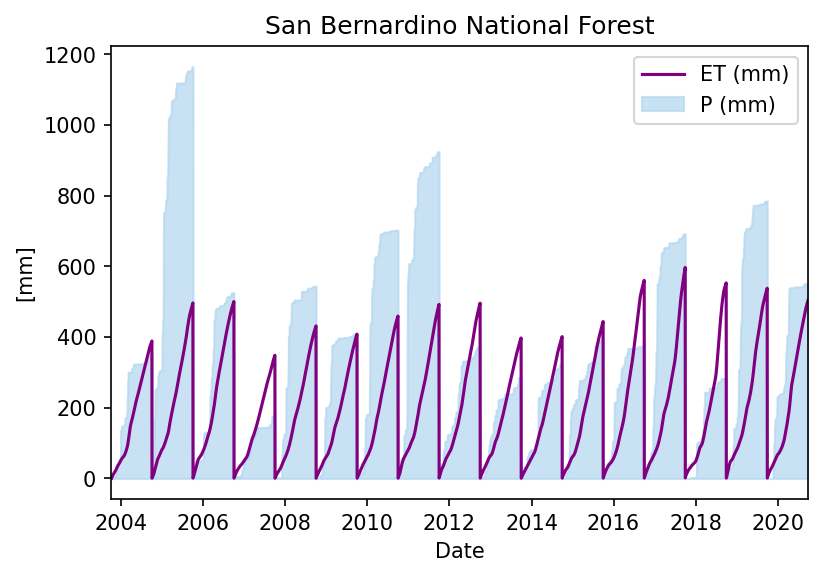

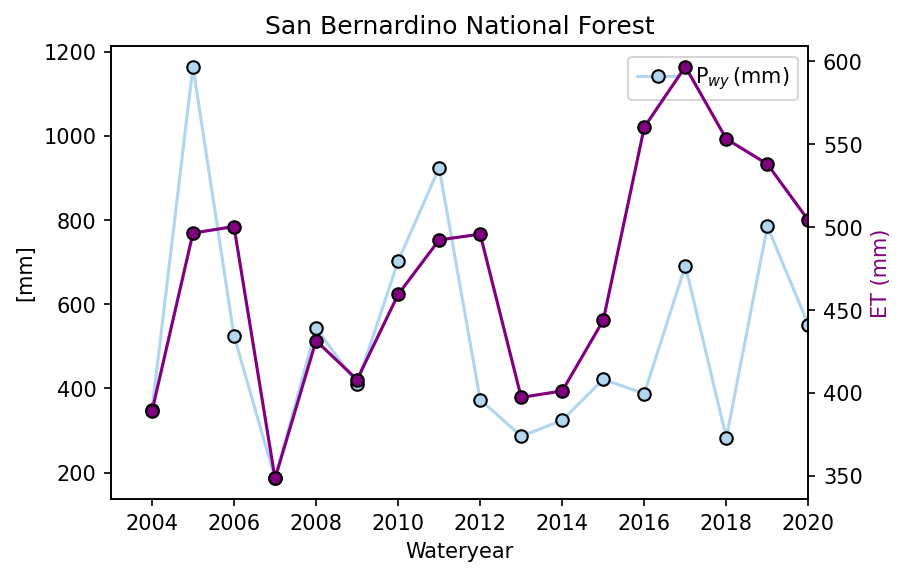

In [ ]:
# San Bern NF
print(f"STATISTICS FOR {sb_nf.site_name.upper()}\n\tMAP: {sb_nf.MAP} mm\n\tMODIS Landcover Class: {sb_nf.stats['value'][0]}\n\tElevation: {sb_nf.stats['value'][1]} m\n\tRWS capacity: {sb_nf.smax} mm\n")


# Cumulative wateryear timeseries
sb_nf.plot(kind = 'timeseries', plot_ET = True, plot_D = False, plot_Dwy = False, dpi = 150, title = sb_nf.site_name);

# Summed wateryear timeseries
sb_nf.plot(kind = 'wateryear', plot_ET = True, plot_D = False, plot_Dwy = False, dpi = 150, legend = True, title = sb_nf.site_name);

STATISTICS FOR SAN ANTONIO FALLS
	MAP: 812 mm
	MODIS Landcover Class: 9
	Elevation: 2030 m
	RWS capacity: 568 mm

Plotting timeseries...
Plotting wateryear data...


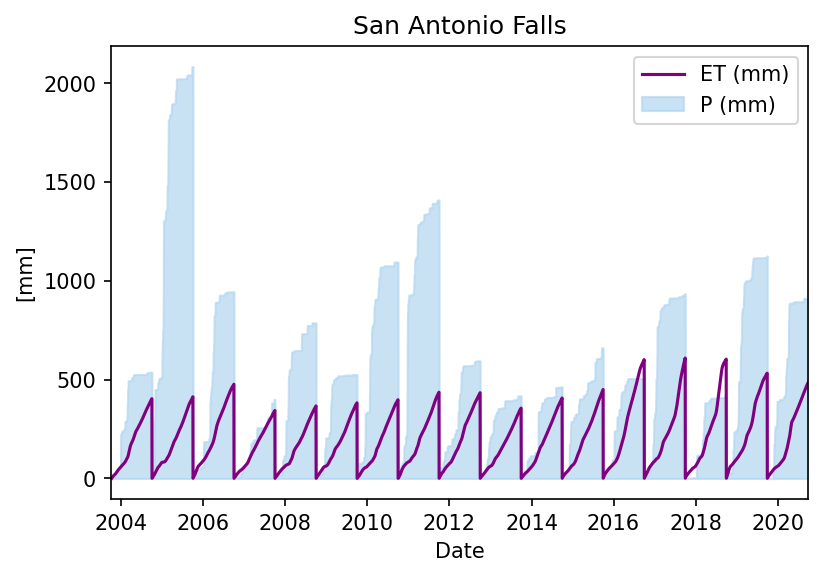

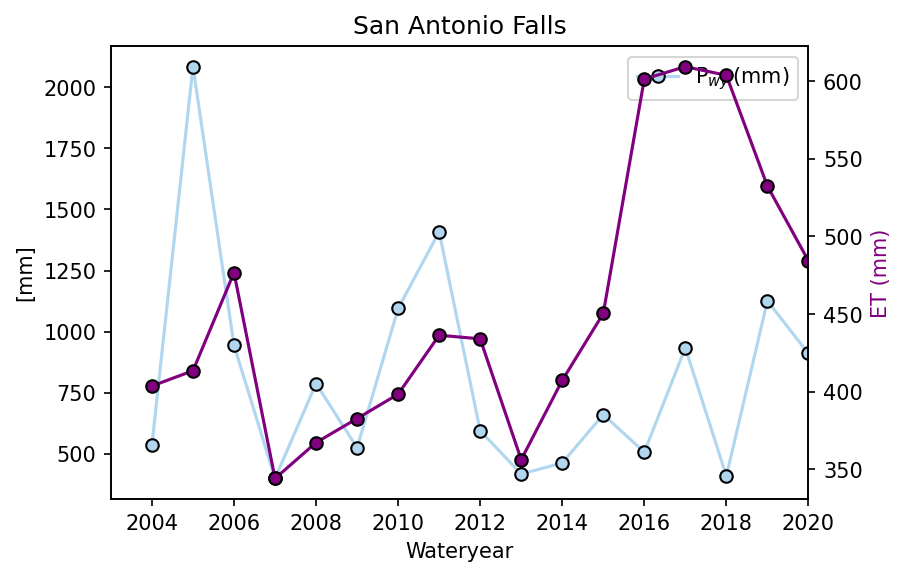

In [ ]:
# San Antonio Falls

# Print out information about elevation, landcover, root-zone water storage capacity estimate, etc
print(f"STATISTICS FOR {saf.site_name.upper()}\n\tMAP: {saf.MAP} mm\n\tMODIS Landcover Class: {saf.stats['value'][0]}\n\tElevation: {saf.stats['value'][1]} m\n\tRWS capacity: {saf.smax} mm\n")


# Cumulative wateryear timeseries
saf.plot(kind = 'timeseries', plot_ET = True, plot_D = False, plot_Dwy = False, dpi = 150, title = saf.site_name);

# Summed wateryear timeseries
saf.plot(kind = 'wateryear', plot_ET = True, plot_D = False, plot_Dwy = False, dpi = 150, legend = True, title = saf.site_name);

STATISTICS FOR THREE SISTERS FALLS
	MAP: 475 mm
	MODIS Landcover Class: 10
	Elevation: 684 m
	RWS capacity: 741 mm

Plotting timeseries...
Plotting wateryear data...


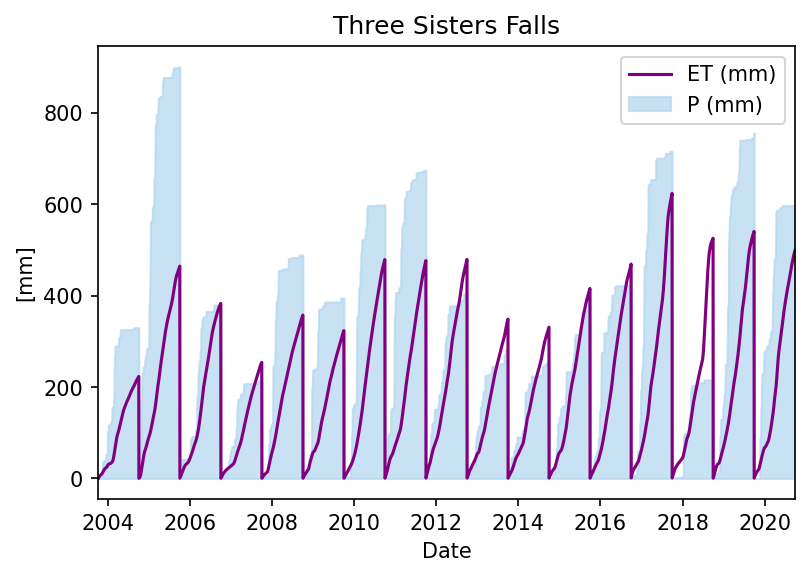

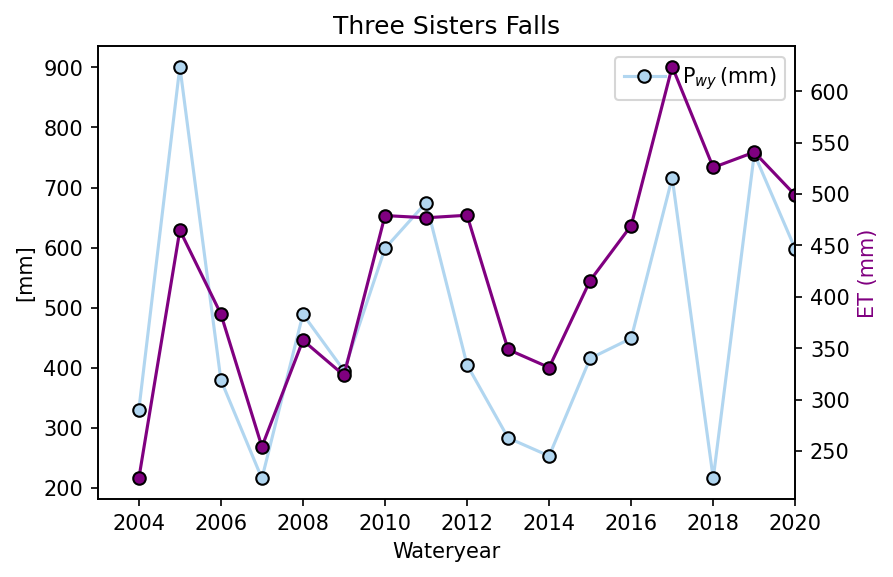

In [ ]:
# Three Sisters Falls

# Print out information about elevation, landcover, root-zone water storage capacity estimate, etc
print(f"STATISTICS FOR {tsf.site_name.upper()}\n\tMAP: {tsf.MAP} mm\n\tMODIS Landcover Class: {tsf.stats['value'][0]}\n\tElevation: {tsf.stats['value'][1]} m\n\tRWS capacity: {tsf.smax} mm\n")


# Cumulative wateryear timeseries
tsf.plot(kind = 'timeseries', plot_ET = True, plot_D = False, plot_Dwy = False, dpi = 150, title = tsf.site_name);

# Summed wateryear timeseries
tsf.plot(kind = 'wateryear', plot_ET = True, plot_D = False, plot_Dwy = False, dpi = 150, legend = True, title = tsf.site_name);

STATISTICS FOR SWEETWATER R NR DESCANSO CA
	MAP: 599 mm
	MODIS Landcover Class: 8.833637727226794
	Elevation: 1308.9347491415924 m
	RWS capacity: 845 mm

Plotting timeseries...
Plotting wateryear data...


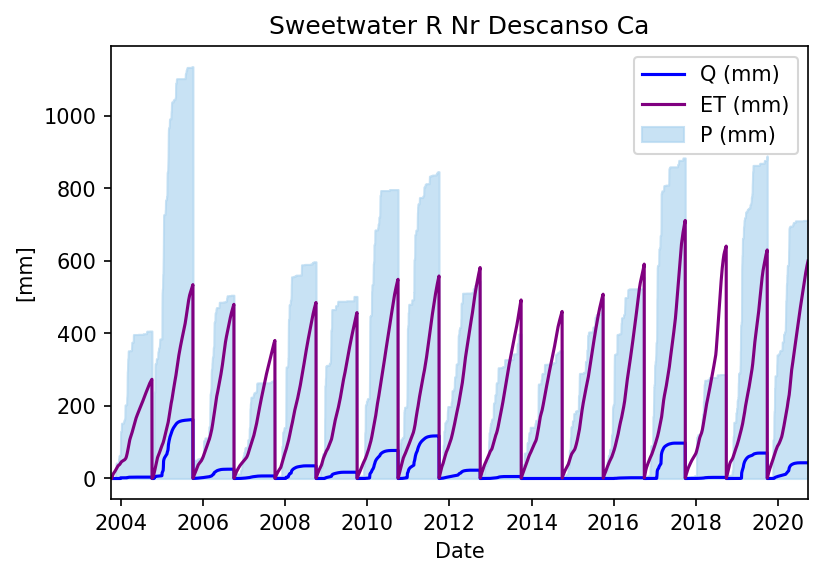

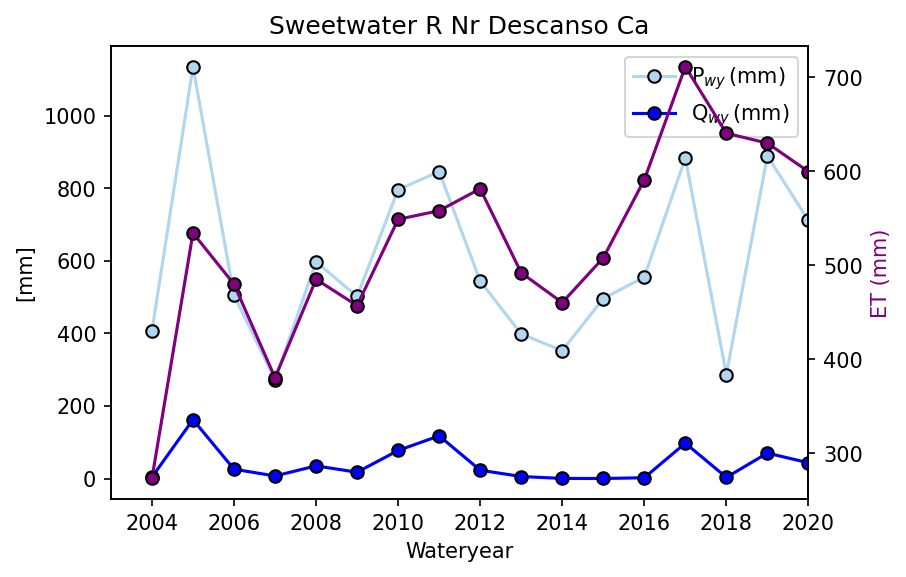

In [ ]:
# USGS Gauge

# Print out information about elevation, landcover, root-zone water storage capacity estimate, etc
print(f"STATISTICS FOR {wtrshd_angeles.site_name[0].upper()}\n\tMAP: {wtrshd_angeles.MAP} mm\n\tMODIS Landcover Class: {wtrshd_angeles.stats['value'][0]}\n\tElevation: {wtrshd_angeles.stats['value'][1]} m\n\tRWS capacity: {wtrshd_angeles.smax} mm\n")


# Cumulative wateryear timeseries
wtrshd_angeles.plot(kind = 'timeseries', plot_ET = True, plot_Q = True, plot_D = False, plot_Dwy = False, dpi = 150, title = wtrshd_angeles.site_name[0]);

# Summed wateryear timeseries
wtrshd_angeles.plot(kind = 'wateryear', plot_ET = True, plot_Q = True, plot_D = False, plot_Dwy = False, dpi = 150, legend = True, title = wtrshd_angeles.site_name[0]);

We can also plot other things, like the root water storage deficit...

Plotting timeseries...
Plotting RWS...


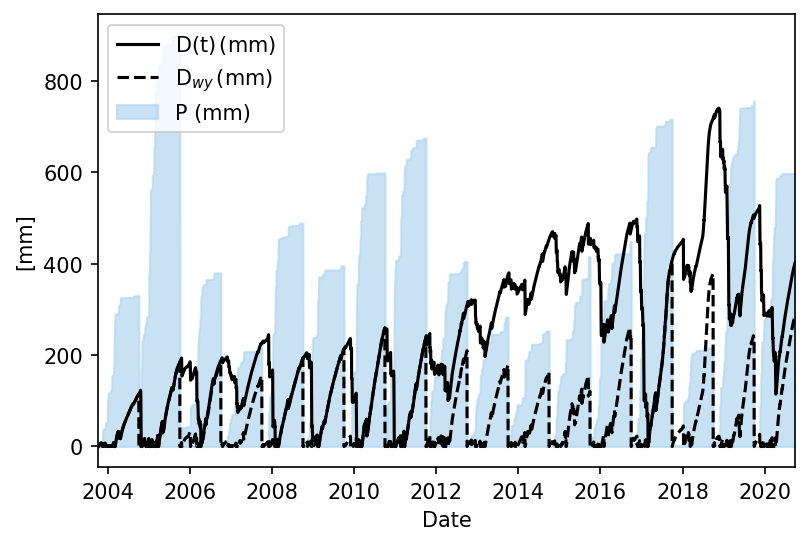

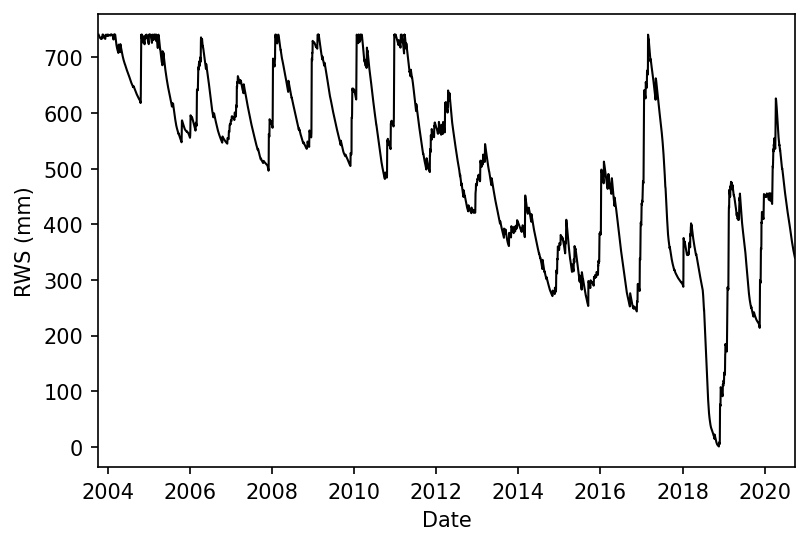

In [ ]:
tsf.plot(kind = 'timeseries', dpi = 150);
tsf.plot(kind = 'RWS', dpi = 150);

#**Step 3**: Dealing with rasters and shapefiles to get full forest-wide analysis

This is better to do outside of Colab!